In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('../data/clean_data/data_v1.csv', index_col = 0)
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [22]:
mean_state_income = df.groupby('fips')['federal_gross_income_adj'].mean().reset_index()

fig = go.Figure(data = go.Choropleth(
    locations = mean_state_income['fips'],
    z = mean_state_income['federal_gross_income_adj'],
    locationmode='USA-states',
    colorscale = 'Oranges',
    colorbar_title = "Mean Income"
))
fig.update_layout(
    geo_scope = 'usa',
    title_text = "2023 Income by State"
)
#fig.write_image('../site_pages/plots/mean_income_by_state.png')


C:\Users\admin\AppData\Local\Temp\ipykernel_23528\1496353851.py:11: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



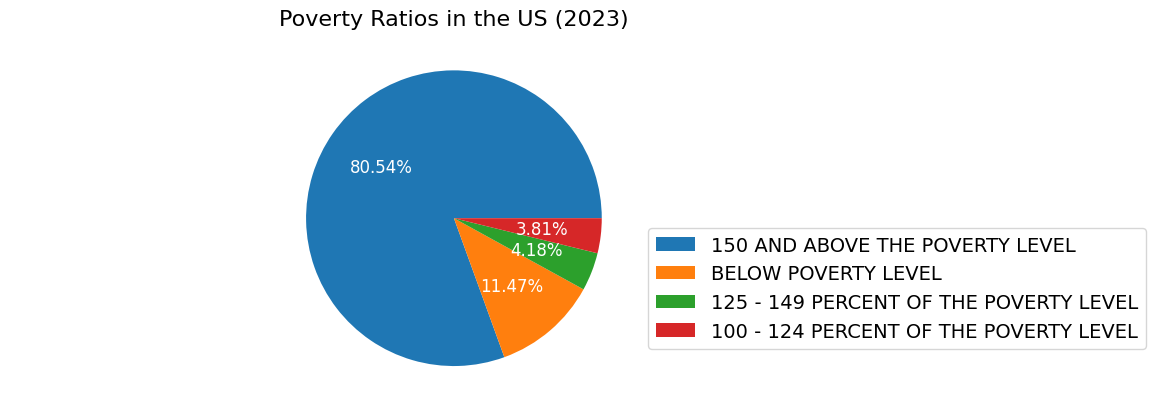

In [42]:
impoverished = df.loc[df['poverty_ratio'] != "NOT IN POVERTY UNIVERSE"]
plt.pie(impoverished['poverty_ratio'].value_counts(),
    labels = impoverished['poverty_ratio'].value_counts().index,
    autopct = '%.2f%%',
    textprops = {'color':'w','fontsize':12})
plt.legend(bbox_to_anchor=(1,0.5),
    loc="best",
    fontsize=14)
plt.title('Poverty Ratios in the US (2023)',
    fontsize = 16)
plt.tight_layout()
plt.savefig('../site_pages/plots/poverty_ratios.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



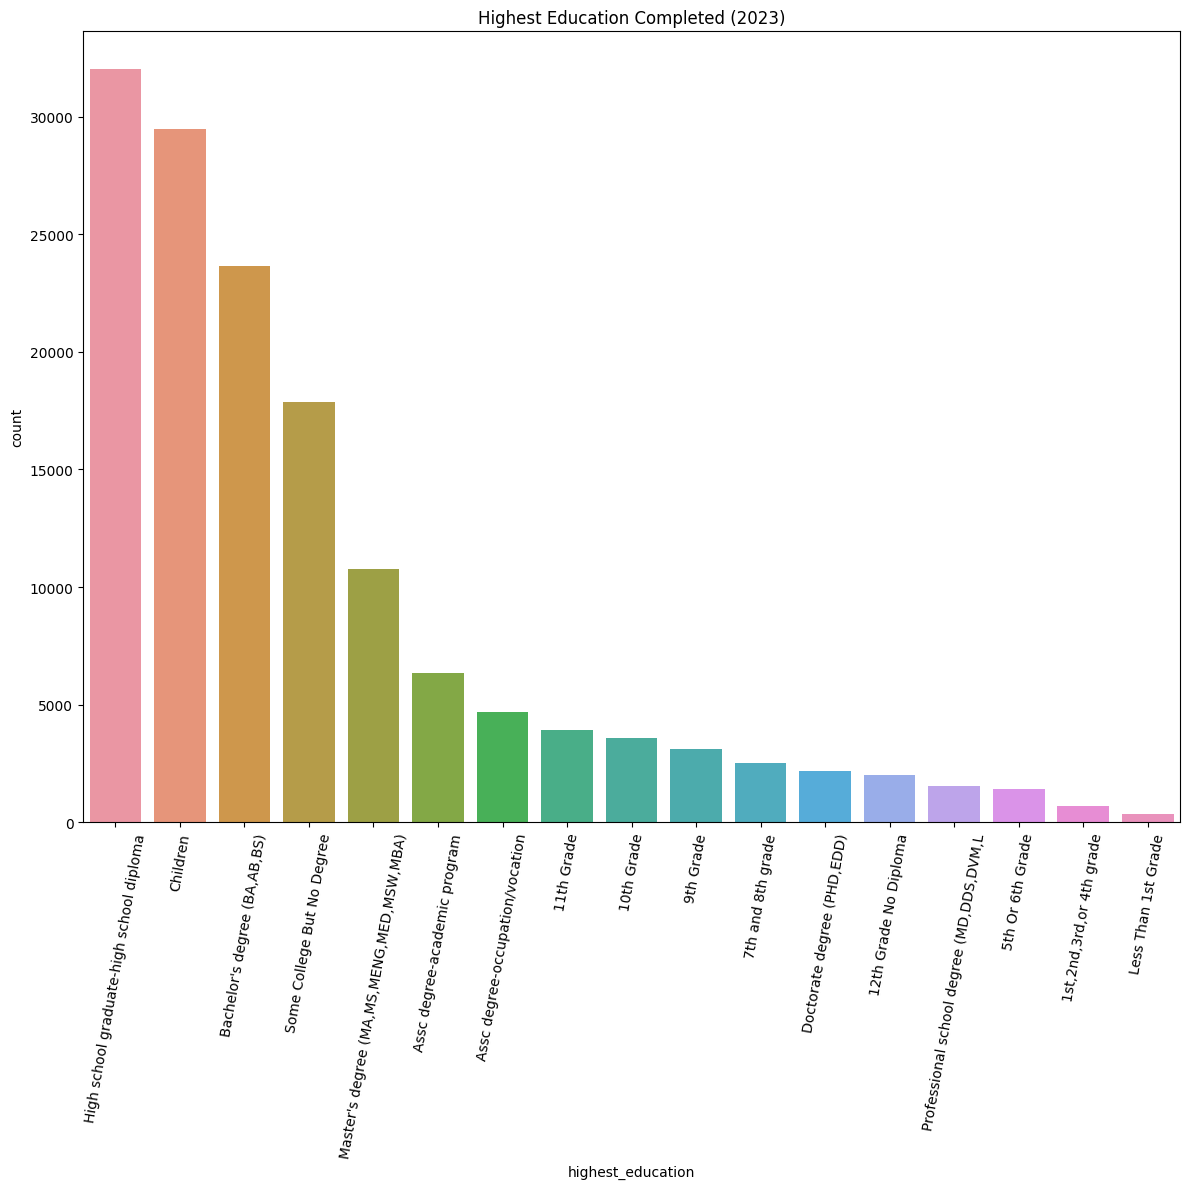

In [62]:
plt.figure(figsize = (12,12))
sns.countplot(data = df, 
                x = "highest_education",
                order = df['highest_education'].value_counts().index)
plt.xticks(rotation = 80)
plt.title("Highest Education Completed (2023)")
plt.tight_layout()
plt.savefig('../site_pages/plots/education.png')

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='federal_gross_income_adj', ylabel='Density'>

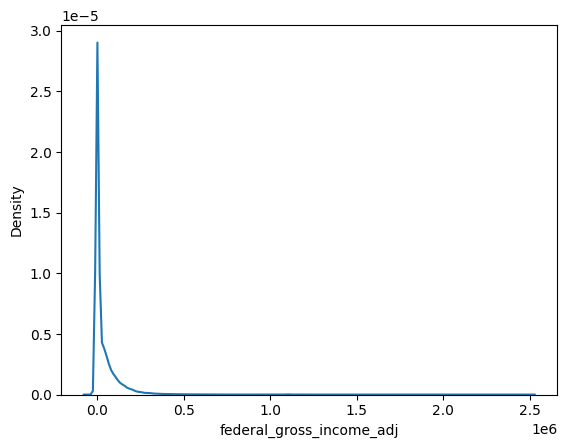

In [70]:
sns.kdeplot(data = df,
    x = "federal_gross_income_adj"
)

In [69]:
df.dtypes

age                           int64
job_industry_recode          object
school_enroll_lastweek       object
employment                    int64
fam_size                      int64
full_time_work                int64
full_part_school              int64
highest_education            object
hs_col_unenrolled             int64
weekly_earnings               int64
hourly_work_yn               object
hours_worked                  int64
labor_force_recode           object
marital_status               object
main_job_industry_recode     object
sex                          object
union_contract_avail         object
union_member_yn              object
reason_unemployed            object
weeks_unemployed              int64
ft_pt_unem                   object
age_recode_gt15              object
federal_gross_income_adj      int64
need_childcare               object
hh_childcare_val              int64
hh_childcare                 object
health_insurance_ly          object
company_offer_insurance     